Do something like:
https://www.researchgate.net/figure/mage-of-Abraham-Lincoln-as-a-matrix-of-pixel-values_fig1_330902210

Load number from mnist dataset as example

Alternative: https://www.researchgate.net/figure/Digitization-and-pixel-values-of-an-image-Image-Pixels-2019_fig1_338332295

In [ ]:
image_path = r'C:\Users\Fabian\Documents\Masterarbeit_Daten\API_test\T32UNA_20230208T103211_TCI_10m.jp2'
image = rasterio.open(image_path)

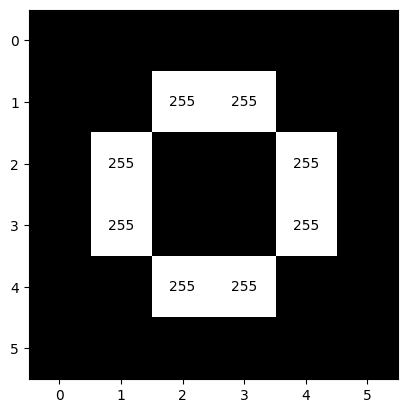

In [3]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

# Laden des Bildes
img = Image.open("Harmons original lincoln.jpg")

# Konvertieren in Graustufen
img = img.convert('L')

# asarray() class is used to convert
# PIL images into NumPy arrays
#numpydata = np.asarray(img)#[:15, :15]
numpydata = np.array([[0, 0, 0, 0, 0, 0],
                        [0, 0, 255, 255, 0, 0],
                        [0, 255, 0, 0, 255, 0],
                        [0, 255, 0, 0, 255, 0],
                        [0, 0, 255, 255, 0, 0],
                        [0, 0, 0, 0, 0, 0]])

height, width = numpydata.shape

#plt.imshow(numpydata, cmap=plt.get_cmap('gray'))
fig, ax = plt.subplots()
im = ax.imshow(numpydata, cmap=plt.get_cmap('gray'))
for i in range(height):
    for j in range(width):
        text = ax.text(j, i, numpydata[i, j],
                       ha="center", va="center")

plt.savefig("Image_to_matrix.pdf", format="pdf", bbox_inches="tight")
plt.show()

In [55]:
numpydata.min()

103

In [38]:
numpydata = np.asarray(img)
test_array = np.array([[0.8, 2.4],
                    [0.1, 2.0]])

In [41]:
numpydata.shape

(184, 144, 3)

TypeError: Image data of dtype object cannot be converted to float

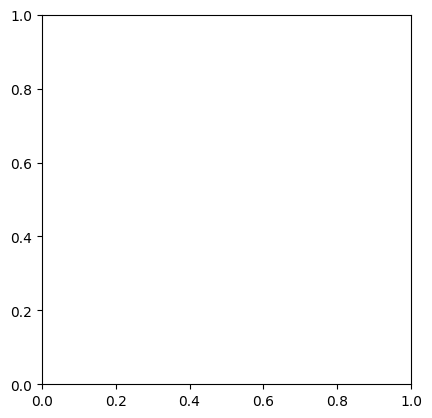

In [33]:
fig, ax = plt.subplots()
im = ax.imshow(numpydata)
plt.show()

In [20]:
img.show()

In [ ]:
fig, ax = plt.subplots()

im, cbar = heatmap(harvest, vegetables, farmers, ax=ax,
                   cmap="YlGn", cbarlabel="harvest [t/year]")
texts = annotate_heatmap(im, valfmt="{x:.1f} t")

fig.tight_layout()
plt.show()

AttributeError: norm

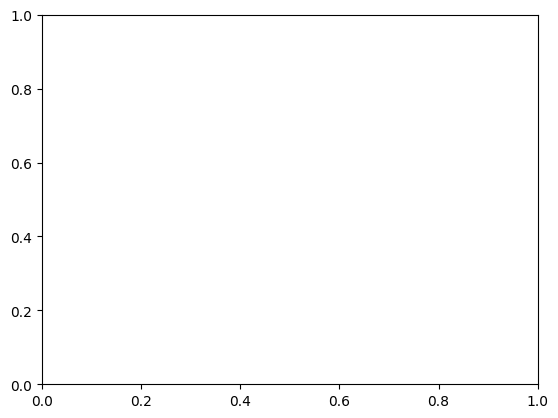

In [29]:
fig, ax = plt.subplots()

texts = annotate_heatmap(img, numpydata, valfmt="{x:.1f} t")

fig.tight_layout()
plt.show()

In [11]:
def annotate_heatmap(im, data=None, valfmt="{x:.2f}",
                     textcolors=("black", "white"),
                     threshold=None, **textkw):
    """
    A function to annotate a heatmap.

    Parameters
    ----------
    im
        The AxesImage to be labeled.
    data
        Data used to annotate.  If None, the image's data is used.  Optional.
    valfmt
        The format of the annotations inside the heatmap.  This should either
        use the string format method, e.g. "$ {x:.2f}", or be a
        `matplotlib.ticker.Formatter`.  Optional.
    textcolors
        A pair of colors.  The first is used for values below a threshold,
        the second for those above.  Optional.
    threshold
        Value in data units according to which the colors from textcolors are
        applied.  If None (the default) uses the middle of the colormap as
        separation.  Optional.
    **kwargs
        All other arguments are forwarded to each call to `text` used to create
        the text labels.
    """

    if not isinstance(data, (list, np.ndarray)):
        data = im.get_array()

    # Normalize the threshold to the images color range.
    if threshold is not None:
        threshold = im.norm(threshold)
    else:
        threshold = im.norm(data.max())/2.

    # Set default alignment to center, but allow it to be
    # overwritten by textkw.
    kw = dict(horizontalalignment="center",
              verticalalignment="center")
    kw.update(textkw)

    # Get the formatter in case a string is supplied
    if isinstance(valfmt, str):
        valfmt = matplotlib.ticker.StrMethodFormatter(valfmt)

    # Loop over the data and create a `Text` for each "pixel".
    # Change the text's color depending on the data.
    texts = []
    for i in range(data.shape[0]):
        for j in range(data.shape[1]):
            kw.update(color=textcolors[int(im.norm(data[i, j]) > threshold)])
            text = im.axes.text(j, i, valfmt(data[i, j], None), **kw)
            texts.append(text)

    return texts

In [1]:
from PIL import Image

# Laden des Bildes
im = Image.open("Abraham-lincoln-low-res.jpg")

# Konvertieren in Graustufen
im = im.convert('L')

# Extrahieren der Pixelwerte als Matrix
pixel_matrix = im.load()

# Ausgabe der Pixelwerte für die ersten 10x10 Pixel
for i in range(10):
    for j in range(10):
        print(pixel_matrix[i, j], end=" ")
    print()

192 192 192 192 192 192 192 192 193 193 
106 106 106 106 106 106 106 106 111 111 
108 108 108 108 108 108 108 108 117 117 
103 103 103 103 103 103 103 103 113 113 
109 109 109 109 109 109 109 109 116 116 
107 107 107 107 107 107 107 107 113 113 
105 105 105 105 105 105 105 105 112 112 
106 106 106 106 106 106 106 106 116 116 
107 107 107 107 107 107 107 107 114 114 
107 107 107 107 107 107 107 107 119 119 


In [3]:
from PIL import Image

# Load the image
image = Image.open("Abraham-lincoln-low-res.jpg")

# Convert the image to grayscale
image = image.convert("L")

# Get the size of the image
width, height = image.size

# Create a matrix of pixel values
pixel_matrix = [[0 for x in range(width)] for y in range(height)]

# Loop through each pixel and set the corresponding value in the matrix
for y in range(height):
    for x in range(width):
        pixel_value = image.getpixel((x, y))
        pixel_matrix[y][x] = pixel_value

# Print the first 10x10 values in the matrix
for y in range(10):
    for x in range(10):
        print(pixel_matrix[y][x], end=" ")
    print()

192 106 108 103 109 107 105 106 107 107 
192 106 108 103 109 107 105 106 107 107 
192 106 108 103 109 107 105 106 107 107 
192 106 108 103 109 107 105 106 107 107 
192 106 108 103 109 107 105 106 107 107 
192 106 108 103 109 107 105 106 107 107 
192 106 108 103 109 107 105 106 107 107 
192 106 108 103 109 107 105 106 107 107 
193 111 117 113 116 113 112 116 114 119 
193 111 117 113 116 113 112 116 114 119 
